In [1]:
import pandas as pd 
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator

import random 
import imutils
import random
import seaborn as sns
import tensorflow as tf

from keras import callbacks
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [2]:
dir = os.getcwd() + "/archive/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        # img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i[-1]])

In [3]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [4]:
len(train_Y)

140000

In [5]:
len(train_X)

140000

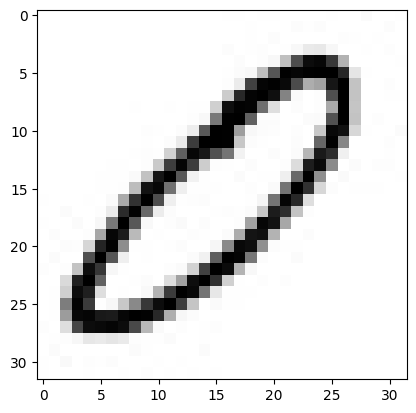

In [6]:
plt.imshow(train_X[4]  , cmap=plt.cm.gray_r,interpolation="nearest")

In [7]:
train_Y[4]

'0'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y,test_size=0.20, random_state=42 ,shuffle=True)

# Task 1:
## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
x_arr =np.array(X_train)

In [12]:
xd =x_arr.reshape(112000,1024)

In [13]:
len(xd)

112000

In [14]:
knn.fit(xd,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_arr =np.array(X_test)

In [16]:
y_te = y_arr.reshape(28000,1024)

In [17]:
predict =knn.predict(y_te)

In [18]:
predict[9]

'B'

In [19]:
accurcy = accuracy_score(y_test,predict)*100
print(str(accurcy)+" %")

88.01785714285715 %


# Task 2:
## CNN

In [20]:
dir = os.getcwd() + "/archive/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [21]:
val_dir = os.getcwd() + "/archive/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [22]:
len(val_data)

15209

In [23]:
random.shuffle(train_data)
random.shuffle(val_data)

In [24]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [25]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [26]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [27]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [28]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [29]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [30]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), name='feature_layer'))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu', name='secondLast_layer'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

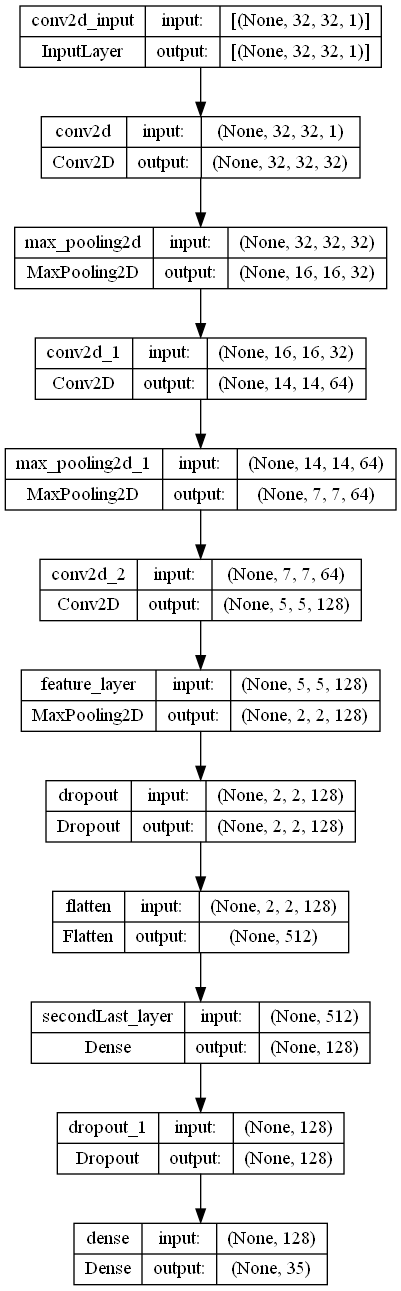

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 feature_layer (MaxPooling2D  (None, 2, 2, 128)        0

In [34]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 10, restore_best_weights = True)

In [35]:
history = model.fit(train_X,train_Y, epochs=75, batch_size=32, validation_data = (val_X, val_Y), verbose=1)
#                     callbacks = [earlystopping])

Epoch 1/75
4375/4375 [==============================] - 23s 4ms/step - loss: 0.5498 - accuracy: 0.8210 - val_loss: 0.6834 - val_accuracy: 0.8472
Epoch 2/75
4375/4375 [==============================] - 17s 4ms/step - loss: 0.3018 - accuracy: 0.8926 - val_loss: 0.6860 - val_accuracy: 0.8306
Epoch 3/75
4375/4375 [==============================] - 17s 4ms/step - loss: 0.2637 - accuracy: 0.9049 - val_loss: 0.6697 - val_accuracy: 0.8476
Epoch 4/75
4375/4375 [==============================] - 17s 4ms/step - loss: 0.2389 - accuracy: 0.9122 - val_loss: 0.6492 - val_accuracy: 0.8632
Epoch 5/75
4375/4375 [==============================] - 17s 4ms/step - loss: 0.2272 - accuracy: 0.9160 - val_loss: 0.7051 - val_accuracy: 0.8623
Epoch 6/75
4375/4375 [==============================] - 16s 4ms/step - loss: 0.2130 - accuracy: 0.9207 - val_loss: 0.6840 - val_accuracy: 0.8788
Epoch 7/75
4375/4375 [==============================] - 17s 4ms/step - loss: 0.2046 - accuracy: 0.9227 - val_loss: 0.6832 - val_ac

In [36]:
model.save('Offline_Handwritten_cudNN8_1.h5')

In [35]:
model = tf.keras.models.load_model("Offline_Handwritten.h5")

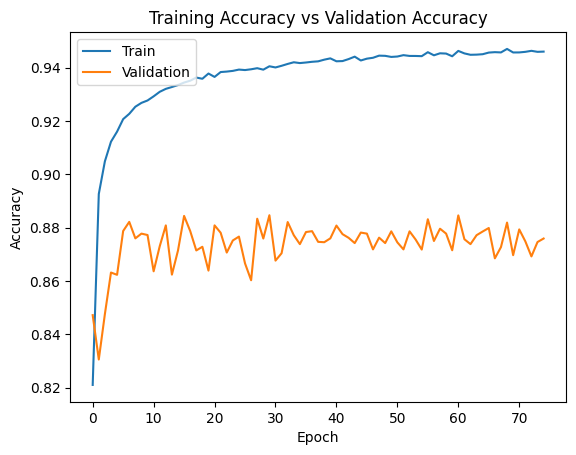

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Recognition and Post-Processing

######    1.The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
######   2.The get letters function fetches the list of letters and get word function gets the individual word.

# Task 3:
## Composite model
##### Create a new composite model by feeding the output of second last layer of CNN to KNN.

In [36]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [37]:
train_X = np.array(train_X)/255.0
# train_X = train_X.reshape(-1,32,32,1)
# train_X = train_X.reshape(112000,1024)
print(train_X.shape)

train_Y = np.array(train_Y)
train_Y.shape

(140000, 32, 32)


(140000,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y,test_size=0.20, random_state=42 ,shuffle=True)

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(X_train.shape[0],32,32,1)
print(f"X_train.shape = {X_train.shape}")
X_test=X_test.reshape(X_test.shape[0],32,32,1)
print(f"X_test.shape = {X_test.shape}")

X_train.shape = (112000, 32, 32, 1)
X_test.shape = (28000, 32, 32, 1)


In [40]:
# new_model = Sequential(model.layers[:-1])
#second_last_layer = model.layers[-2].output
#new_model = Model(inputs=model.input, outputs=second_last_layer)

from keras.models import Model

new_model = Model(inputs=model.input,outputs=model.get_layer('secondLast_layer').output)
X_train = new_model.predict(X_train)
print(f"X_train.shape = {X_train.shape}")
X_test = new_model.predict(X_test)
print(f"X_test.shape = {X_test.shape}")
#Convert back the labels
y_train = np.array(y_train)
print(f"y_train.shape = {y_train.shape}")
# y_train=[ np.where(r==1)[0][0] for r in y_train ]
#We are now going to have a single row for each example 
X_train=X_train.reshape(112000,128)
X_test=X_test.reshape(28000,128)

3500/3500 [==============================] - 10s 1ms/step
X_train.shape = (112000, 128)
875/875 [==============================] - 1s 2ms/step
X_test.shape = (28000, 128)
y_train.shape = (112000,)


In [46]:
#X_test = np.array(X_test)
#X_test = X_test.reshape(28000,1024)

In [47]:
#X_train_features = new_model.predict(X_train)
#X_test_features = new_model.predict(X_test)

In [48]:
#knn_model = KNeighborsClassifier(n_neighbors=5)
#knn_model.fit(X_train_features, y_train)

In [41]:
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
knc.score(X_train,y_train)
knn_predict=knc.predict(X_test)
#submissions=pd.DataFrame({"ImageId":list(range(1,len(knn_predict)+1)),"Label":knn_predict})
#submissions.to_csv("results.csv",index=False,header=True) 

In [50]:
#y_pred = knn_model.predict(X_test_features)

In [42]:
accuracy = accuracy_score(y_test, knn_predict)
print(str(accuracy * 100)+" %")

94.78571428571428 %


In [43]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [44]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# g_res.best_score_

In [ ]:
# g_res.best_params_

In [52]:
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=10)

In [53]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [54]:
import sklearn.metrics as metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9593035714285715
Test set accuracy:  0.9483928571428571
